___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()



**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

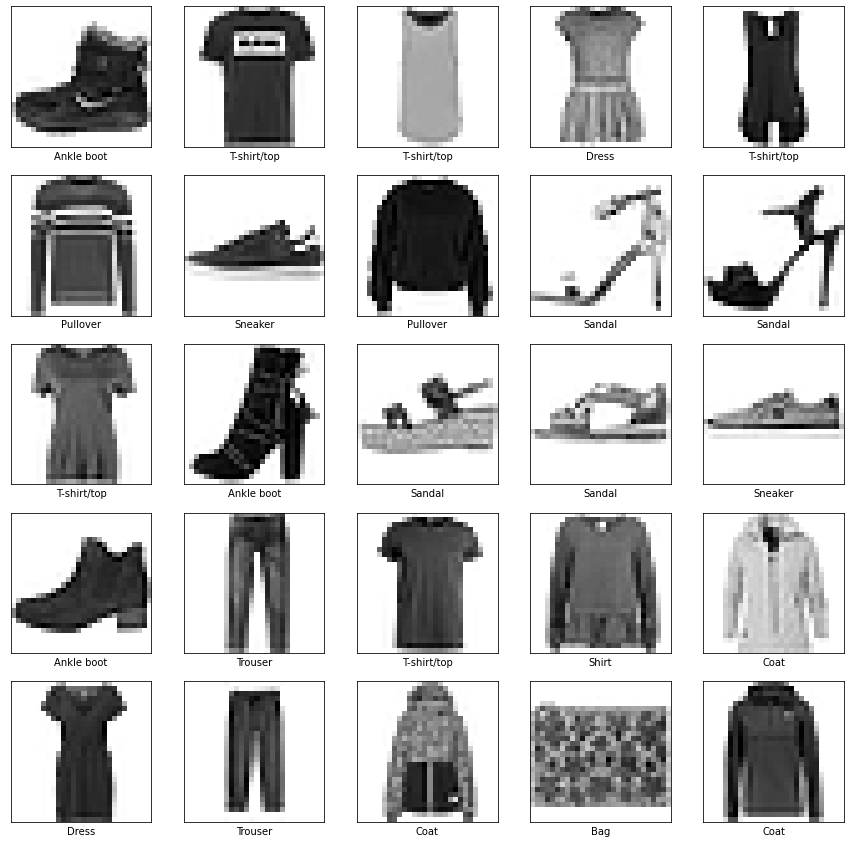

In [ ]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
X_train = x_train.reshape(x_train.shape[0],28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train = y_train.reshape(-1, 1)
y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

In [ ]:
ohe = OneHotEncoder(sparse=False)
y_train = ohe.fit_transform(y_train)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_test = y_test.reshape(-1, 1)
y_test

array([[9],
       [2],
       [1],
       ...,
       [8],
       [1],
       [5]], dtype=uint8)

In [ ]:
ohe = OneHotEncoder(sparse=False)
y_test = ohe.fit_transform(y_test)
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_test.shape

(10000, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout

Let us separate 40% of the test set for validation purposes. This will provide us a validation set that have same distribution with test set.

In [ ]:
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.4, random_state=2018)

In [ ]:
X_val.shape

(4000, 28, 28, 1)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_initializer='he_normal', kernel_size=(3,3), input_shape=(28,28,1), activation='relu',padding='same'))  
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'))  
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) 
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax')) 

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 3, 3, 128)      

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode = "min", verbose = 1, patience = 25, restore_best_weights = True)
# we will use sligtly more lenient callbacks for early stopping
# making the default callbacks slighly more lenient
callbacks_list2 = [
    # reduce learning rate by a factor of 10 of val_loss 
    # does not reduce for 3 epochs
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=4,
        min_lr=0.00000001
    ),
    # Early stop training if val_acc falls or stays flat for 7 epochs
    EarlyStopping(
        monitor='val_accuracy',
        min_delta=0.00001,
        patience=7        
    ),
]

In [ ]:
model.fit(X_train, y_train, 
          batch_size=128, 
          epochs=50, 
          validation_data=(X_val, y_val),
          callbacks=[early_stop])

Epoch 1/50
469/469 [==============================] - 5s 8ms/step - loss: 0.4343 - accuracy: 0.8409 - val_loss: 0.3606 - val_accuracy: 0.8670
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2727 - accuracy: 0.8988 - val_loss: 0.3040 - val_accuracy: 0.8857
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2308 - accuracy: 0.9133 - val_loss: 0.2492 - val_accuracy: 0.9078
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1992 - accuracy: 0.9249 - val_loss: 0.2806 - val_accuracy: 0.8928
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1758 - accuracy: 0.9340 - val_loss: 0.2337 - val_accuracy: 0.9155
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1535 - accuracy: 0.9408 - val_loss: 0.2412 - val_accuracy: 0.9165
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1356 - accuracy: 0.9488 - val_loss: 0.2464 - val_accuracy: 0.9178
Epoch 

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.434257,0.840867,0.360637,0.86700
1,0.272692,0.898750,0.304023,0.88575
2,0.230829,0.913300,0.249213,0.90775
3,0.199221,0.924933,0.280622,0.89275
4,0.175784,0.934017,0.233745,0.91550


In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 3, 3, 128)      

**TASK 7: Plot values of metrics you used in your model.**

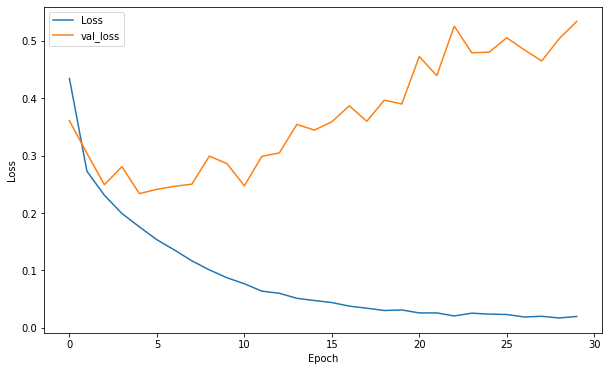

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss", "val_loss"], loc='best')

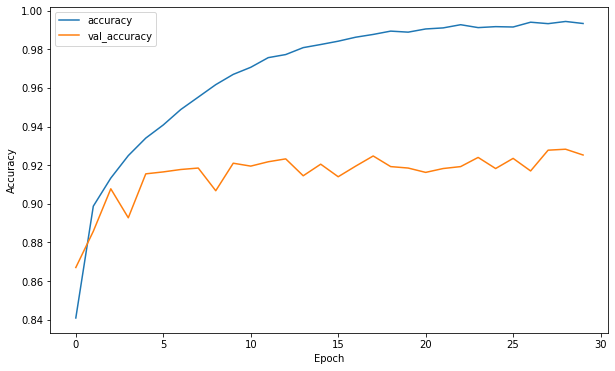

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["accuracy", "val_accuracy"], loc='best')

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
preds = model.predict(X_test)

In [ ]:
predictions= np.argmax(preds, axis=1)

In [ ]:
y_test_class= np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test_class, predictions, target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.84      0.86       596
     Trouser       1.00      0.98      0.99       616
    Pullover       0.88      0.86      0.87       583
       Dress       0.91      0.94      0.92       624
        Coat       0.84      0.90      0.87       623
      Sandal       0.97      0.99      0.98       591
       Shirt       0.76      0.73      0.74       581
     Sneaker       0.98      0.94      0.96       613
         Bag       0.98      0.98      0.98       600
  Ankle boot       0.95      0.98      0.96       573

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



In [ ]:
print(confusion_matrix(y_test_class, predictions))

[[501   0  13   5   0   1  73   0   3   0]
 [  1 605   0   8   0   0   1   0   1   0]
 [  7   0 503   6  38   0  28   0   1   0]
 [  5   1   4 588  12   1  13   0   0   0]
 [  0   1  19  22 561   0  20   0   0   0]
 [  0   0   0   0   0 585   0   2   0   4]
 [ 52   1  29  16  53   0 425   0   5   0]
 [  0   0   0   0   0  12   0 576   0  25]
 [  2   0   0   4   2   0   0   0 591   1]
 [  0   0   1   0   0   3   0   7   0 562]]


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2271360456943512
Test accuracy: 0.9161666631698608


## New Model with Dropout: Overfitting

The validation accuracy does not improve after few epochs and the validation loss is increasing after few epochs. This confirms that the model is overfitted. To reduce overfitting problem, let us use dropout method and rerun the model.

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_initializer='he_normal', kernel_size=(3,3), input_shape=(28,28,1), activation='relu',padding='same'))  
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.15))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'))  
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten()) 
model.add(Dropout(0.4))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax')) 

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_105 (Dropout)       (None, 14, 14, 32)        0         
                                                                 
 conv2d_55 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_106 (Dropout)       (None, 7, 7, 64)        

In [ ]:
model.fit(X_train, y_train, 
          batch_size=32, 
          epochs=100, 
          validation_data=(X_val, y_val),
          callbacks=callbacks_list2)

Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5981 - accuracy: 0.7783 - val_loss: 0.3786 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4113 - accuracy: 0.8483 - val_loss: 0.3123 - val_accuracy: 0.8830 - lr: 0.0010
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3639 - accuracy: 0.8675 - val_loss: 0.3064 - val_accuracy: 0.8832 - lr: 0.0010
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3434 - accuracy: 0.8751 - val_loss: 0.2940 - val_accuracy: 0.8945 - lr: 0.0010
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3298 - accuracy: 0.8809 - val_loss: 0.2653 - val_accuracy: 0.9003 - lr: 0.0010
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3138 - accuracy: 0.8853 - val_loss: 0.2626 - val_accuracy: 0.8982 - lr: 0.0010
Epoch 7/100
1875/1875 [=============================

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.598120,0.778350,0.378609,0.86000,0.001
1,0.411315,0.848300,0.312255,0.88300,0.001
2,0.363936,0.867483,0.306402,0.88325,0.001
3,0.343410,0.875100,0.294045,0.89450,0.001
4,0.329818,0.880917,0.265332,0.90025,0.001


In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_105 (Dropout)       (None, 14, 14, 32)        0         
                                                                 
 conv2d_55 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_106 (Dropout)       (None, 7, 7, 64)        

**TASK 7: Plot values of metrics you used in your model.**

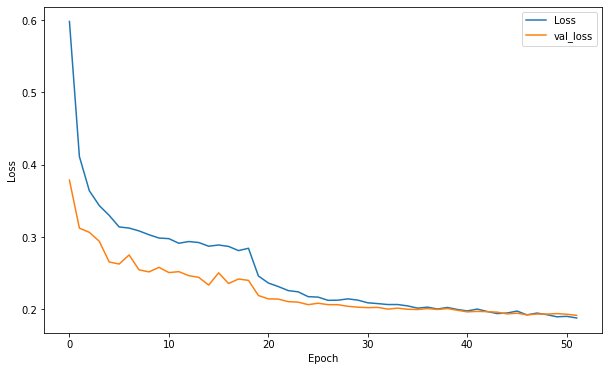

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss", "val_loss"], loc='best')

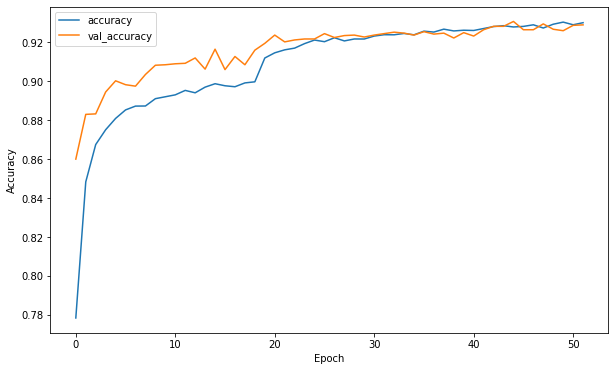

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["accuracy", "val_accuracy"], loc='best')

In [ ]:
preds = model.predict(X_test)

In [ ]:
predictions= np.argmax(preds, axis=1)

In [ ]:
y_test_class= np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test_class, predictions, target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.89      0.89       596
     Trouser       1.00      0.98      0.99       616
    Pullover       0.90      0.90      0.90       583
       Dress       0.90      0.94      0.92       624
        Coat       0.88      0.89      0.89       623
      Sandal       1.00      0.98      0.99       591
       Shirt       0.80      0.76      0.78       581
     Sneaker       0.95      0.99      0.97       613
         Bag       1.00      0.98      0.99       600
  Ankle boot       0.98      0.95      0.97       573

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000



In [ ]:
print(confusion_matrix(y_test_class, predictions))

[[533   0   6  11   3   0  43   0   0   0]
 [  0 604   0  11   0   0   1   0   0   0]
 [ 10   1 523   5  20   0  24   0   0   0]
 [  4   0   6 589  12   0  13   0   0   0]
 [  0   0  22  17 554   0  30   0   0   0]
 [  0   0   0   0   0 582   0   8   0   1]
 [ 55   0  24  20  37   0 444   0   1   0]
 [  0   0   0   0   0   1   0 604   0   8]
 [  2   0   1   2   1   0   3   0 591   0]
 [  0   0   0   0   0   1   0  26   1 545]]


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21063560247421265
Test accuracy: 0.9281666874885559


___Model Decision:___ With a complex sequential model with multiple convolution layers and 50 epochs with batch size of 128 for the training, we obtained an accuracy ~0.91 for test prediction. After investigating the validation accuracy and loss, we understood that the model is overfitting. 

We retrained the model with Dropout layers to the model to reduce overfitting.
We confirmed the model improvement and with the same number of epochs for the training we obtained with the new model an accuracy of ~0.93 for test prediction. Only few classes are not correctly classified all the time, especially Class 6 (Shirt) and Class 2 (Pullover). Another major change is related to callbacks. In the first model, we use early stopping. But, in the new model we introduce val_accuracy and val_loss with learning rate limits for stopping conditions

## Prediction

In [ ]:
model.save('CNN_ModelNew2.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('CNN_ModelNew2.h5')

In [ ]:
my_sample = X_test[3]

In [ ]:
my_sample.shape

(28, 28, 1)

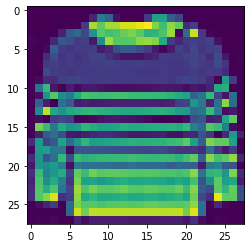

In [ ]:
plt.imshow(my_sample.reshape(28,28));

In [ ]:
pred_prob = model.predict(my_sample.reshape(1,28,28,1))
pred_prob

array([[9.6704505e-02, 7.2725208e-11, 8.9222920e-01, 8.9366695e-06,
        5.1539024e-05, 8.1367274e-12, 1.0744064e-02, 1.6833700e-16,
        2.6167263e-04, 1.2256892e-15]], dtype=float32)

In [ ]:
y_pred = np.argmax(pred_prob)
y_pred

2

In [ ]:
print(classes[np.argmax(y_test[3])])
print(classes[y_pred])

Pullover
Pullover


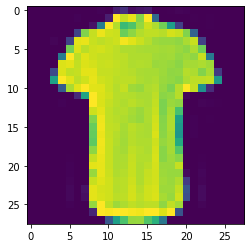

In [ ]:
my_sample = X_test[20]
plt.imshow(my_sample.reshape(28,28));


In [ ]:
pred_prob = model.predict(my_sample.reshape(1,28,28,1))
y_pred = np.argmax(pred_prob)
print(classes[np.argmax(y_test[20])])
print(classes[y_pred])


Shirt
Shirt


Coat
Coat


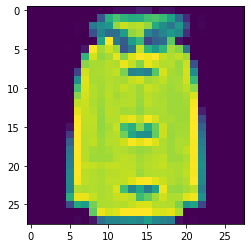

In [ ]:
my_sample = X_test[2999]
plt.imshow(my_sample.reshape(28,28));
pred_prob = model.predict(my_sample.reshape(1,28,28,1))
y_pred = np.argmax(pred_prob)
print(classes[np.argmax(y_test[2999])])
print(classes[y_pred])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___